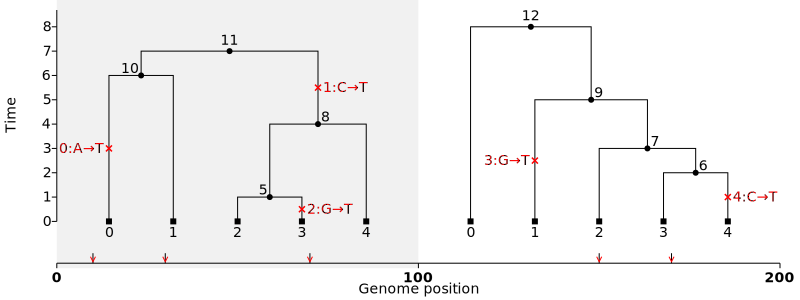

In [62]:
import tskit
import io

nodes = """\
is_sample time
1         0 
1         0
1         0
1         0
1         0
0         1
0         2
0         3
0         4
0         5
0         6
0         7
0         8
"""

edges = """\
left right parent child
0    100   10      0,1
0    100   5      2,3
0    100   8      4,5
0    100   11     8,10
100  200   12     0,9
100  200   9      1,7
100  200   7      2,6
100  200   6      3,4
"""

sites = """\
position ancestral_state
10       A
30       C
70       G
150      G
170      C
"""

mutations = """\
site node parent derived_state
0    0    -1     T
1    8    -1     T
2    3    -1     T
3    1    -1     T
4    4    -1     T
"""

ts = tskit.load_text(
    nodes=io.StringIO(nodes),
    edges=io.StringIO(edges),
    sites=io.StringIO(sites),
    # individuals=io.StringIO(individuals),
    mutations=io.StringIO(mutations),
    strict=False,
)

mut_labels = {}  # An array of labels for the mutations
for mut in ts.mutations():  # Make pretty labels showing the change in state
    site = ts.site(mut.site)
    older_mut = mut.parent >= 0  # is there an older mutation at the same position?
    prev = ts.mutation(mut.parent).derived_state if older_mut else site.ancestral_state
    mut_labels[mut.id] = f"{site.id}:{prev}→{mut.derived_state}"

ts.draw_svg(
    size=(800, 300),
    y_axis=True,
    mutation_labels=mut_labels
)

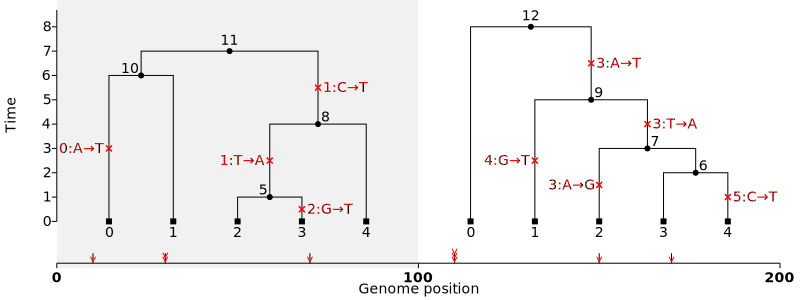

In [63]:
import tskit
import io

nodes = """\
is_sample time
1         0 
1         0
1         0
1         0
1         0
0         1
0         2
0         3
0         4
0         5
0         6
0         7
0         8
"""

edges = """\
left right parent child
0    100   10      0,1
0    100   5      2,3
0    100   8      4,5
0    100   11     8,10
100  200   12     0,9
100  200   9      1,7
100  200   7      2,6
100  200   6      3,4
"""

sites = """\
position ancestral_state
10       A
30       C
70       G
110      A
150      G
170      C
"""

mutations = """\
site node parent derived_state
0    0    -1     T
1    8    -1     T
2    3    -1     T
4    1    -1     T
5    4    -1     T
1    5    1      A
3    9    -1     T
3    7    6      A
3    2    7      G
"""

ts = tskit.load_text(
    nodes=io.StringIO(nodes),
    edges=io.StringIO(edges),
    sites=io.StringIO(sites),
    # individuals=io.StringIO(individuals),
    mutations=io.StringIO(mutations),
    strict=False,
)

mut_labels = {}  # An array of labels for the mutations
for mut in ts.mutations():  # Make pretty labels showing the change in state
    site = ts.site(mut.site)
    older_mut = mut.parent >= 0  # is there an older mutation at the same position?
    prev = ts.mutation(mut.parent).derived_state if older_mut else site.ancestral_state
    mut_labels[mut.id] = f"{site.id}:{prev}→{mut.derived_state}"

ts.draw_svg(
    size=(800, 300),
    y_axis=True,
    mutation_labels=mut_labels
)

In [64]:
from tskit_ld_proto.ld_proto import get_state

In [65]:
get_state(ts)

array([[1, 0, 0, 0, 0],
       [0, 0, 2, 2, 1],
       [0, 0, 0, 1, 0],
       [0, 1, 2, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1]])

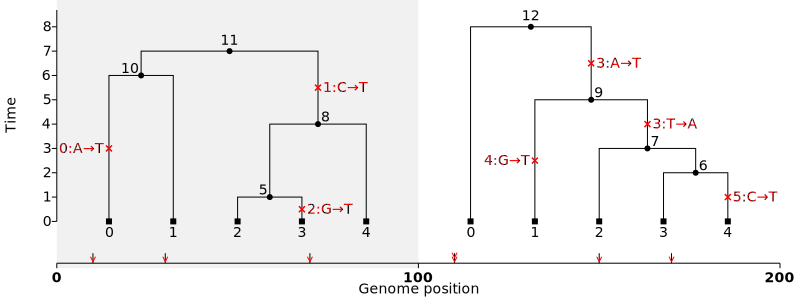

In [73]:
import tskit
import io

nodes = """\
is_sample time
1         0 
1         0
1         0
1         0
1         0
0         1
0         2
0         3
0         4
0         5
0         6
0         7
0         8
"""

edges = """\
left right parent child
0    100   10      0,1
0    100   5      2,3
0    100   8      4,5
0    100   11     8,10
100  200   12     0,9
100  200   9      1,7
100  200   7      2,6
100  200   6      3,4
"""

sites = """\
position ancestral_state
10       A
30       C
70       G
110      A
150      G
170      C
"""

mutations = """\
site node parent derived_state
0    0    -1     T
1    8    -1     T
2    3    -1     T
4    1    -1     T
5    4    -1     T
3    9    -1     T
3    7    5      A
"""

ts = tskit.load_text(
    nodes=io.StringIO(nodes),
    edges=io.StringIO(edges),
    sites=io.StringIO(sites),
    # individuals=io.StringIO(individuals),
    mutations=io.StringIO(mutations),
    strict=False,
)

mut_labels = {}  # An array of labels for the mutations
for mut in ts.mutations():  # Make pretty labels showing the change in state
    site = ts.site(mut.site)
    older_mut = mut.parent >= 0  # is there an older mutation at the same position?
    prev = ts.mutation(mut.parent).derived_state if older_mut else site.ancestral_state
    mut_labels[mut.id] = f"{site.id}:{prev}→{mut.derived_state}"

ts.draw_svg(
    size=(800, 300),
    y_axis=True,
    mutation_labels=mut_labels
)

In [74]:
get_state(ts)

array([[1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [85]:
import numpy as np

In [91]:
for s in np.asarray([ts.samples()]):
    print(s)

[0 1 2 3 4]


In [96]:
ts.diversity()

False

In [97]:
len(np.asarray([ts.samples()]))

1

In [108]:
ts.diversity(sample_sets=[[0, 1], [2, 3, 4]])

array([0.015     , 0.00666667])